# Data Visualization


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
url = "https://raw.githubusercontent.com/DmitryPavlyuk/python-da/main/week5/data/bikes.csv"
url2 = "https://raw.githubusercontent.com/DmitryPavlyuk/python-da/main/week5/data/bikes_test.csv"
bikes = pd.read_csv(url)
bikes2 = pd.read_csv(url2)
bikes = pd.concat([bikes,bikes2])
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,01/01/2011 03:00,spring,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [14]:
bikes["datetime"] = pd.to_datetime(bikes["datetime"], format='%d/%m/%Y %H:%M')
bikes["season"] = bikes["season"].astype('category')
bikes["weather"] = bikes["weather"].astype('category')
bikes["holiday"] = bikes["holiday"].astype('category')
bikes["workingday"] = bikes["workingday"].astype('category')
bikes["humidity"] = bikes["humidity"].astype(float)
bikes.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual               float64
registered           float64
count                float64
dtype: object

Panda graph types
- Histogram
- desity plots
- box plots
- scatter plots
- bar plots
- pie charts
- line plots
- area plots

<AxesSubplot:ylabel='Frequency'>

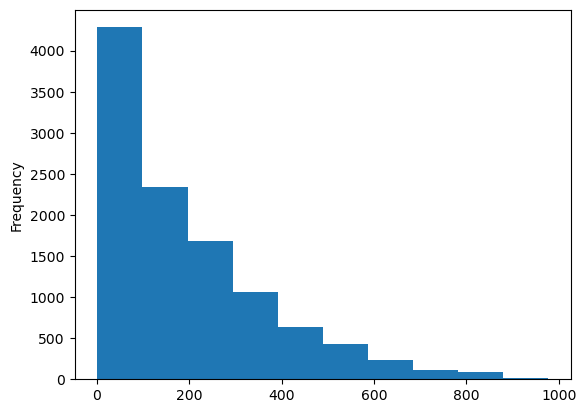

In [15]:
bikes["count"].plot.hist()

Matplotlib graph types
- advanded layouts
- full control over presentation

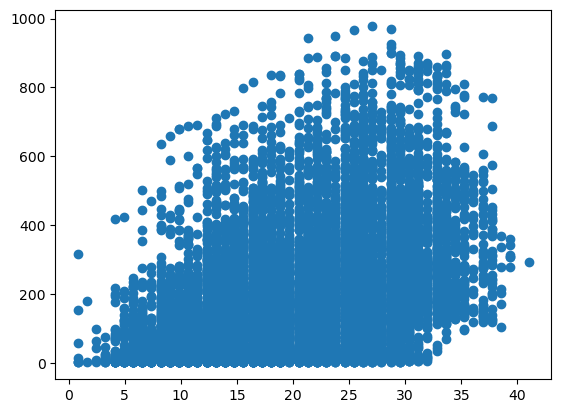

In [16]:
figure, axis = plt.subplots()
axis.scatter(x=bikes['temp'], y=bikes['count'])
plt.show()

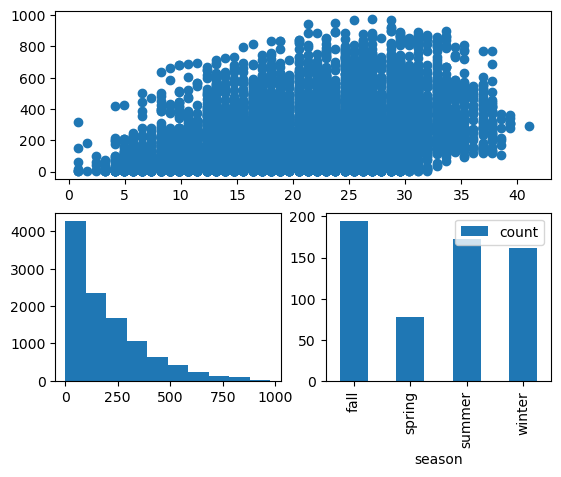

In [17]:
from matplotlib.gridspec import GridSpec
fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax1.scatter(x=bikes['temp'], y=bikes['count'])
ax2.hist(bikes['count'])
bikes.groupby("season").agg({'count':'median'}).plot.bar(ax=ax3)
plt.show()

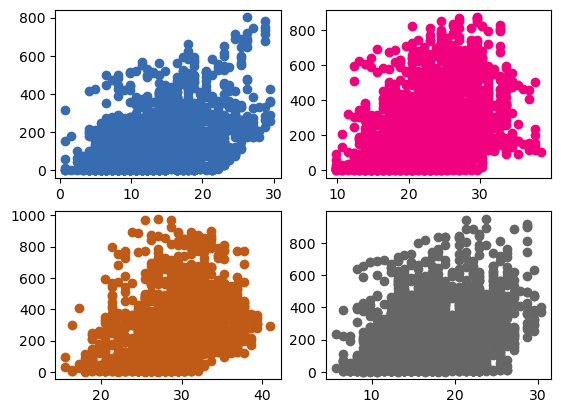

In [22]:
figure, axis = plt.subplots(2, 2)
axis = axis.flatten()
i = 0
for season in bikes['season'].unique():
    axis[i].scatter(x=bikes.loc[bikes['season']==season,'temp'],
                    y=bikes.loc[bikes['season']==season,'count'],
                    color=plt.cm.Accent.colors[i+4])
    i+=1
plt.show()

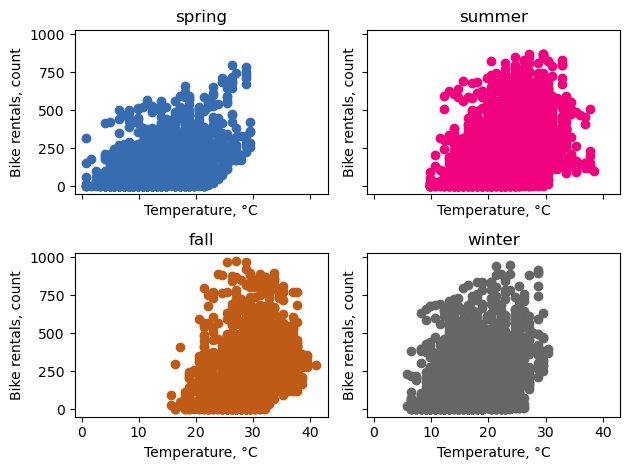

In [24]:
deg = u'\N{DEGREE SIGN}'

figure, axis = plt.subplots(2, 2, sharex=True, sharey=True)
axis = axis.flatten()
i = 0
for season in bikes['season'].unique():
    axis[i].scatter(x=bikes.loc[bikes['season']==season,'temp'],
                    y=bikes.loc[bikes['season']==season,'count'],
                    color=plt.cm.Accent.colors[i+4])
    axis[i].set_title(season)
    axis[i].set_xlabel("Temperature, "+deg+"C")
    axis[i].set_ylabel("Bike rentals, count")
    i+=1
figure.tight_layout()
plt.show()

In [25]:
def make_plot():
    figure, axis = plt.subplots(figsize=(12, 5))
    for season in bikes['season'].unique():
        axis.scatter(x=bikes.loc[bikes['season']==season,'temp'],
                     y=bikes.loc[bikes['season']==season,'count'],
                     label=season, cmap=plt.cm.Accent)
    axis.set_title("Bike rentals vs. Temperature") #Title
    axis.set_xlabel("Temperature, "+deg+"C") # X axis' label
    axis.set_ylabel("Bike rentals, count") # Y axis' label
    axis.set_ylim([0,1200]) # Y axis' limits
    axis.set_xlim([0,45]) # X axis' limits
    startx, endx = axis.get_xlim()
    start, end = axis.get_ylim()
    axis.xaxis.set_ticks(np.arange(startx, endx, 10)) # Sequence of X ticks
    axis.yaxis.set_ticks(np.arange(start, end, 400)) # Sequence of Y ticks

    axis.tick_params(axis='x',
                     labelrotation=45,
                     color='red',
                     labelcolor='blue',
                     grid_color="red",
                     grid_alpha=0.5) # X axis' tick format
    axis.get_yticklabels()[1].set_color('red') # Individual X axis' tick format
    axis.legend(loc='upper left'); # Legend
    plt.grid() # Show grid

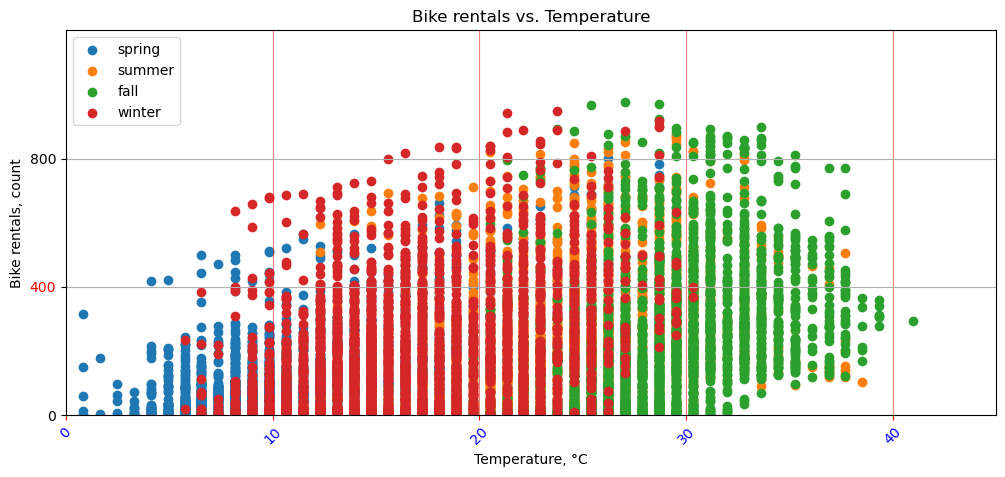

In [26]:
make_plot()